## Data Preprocessing

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [59]:
hk = pd.read_csv('calendarhk.csv')
sg = pd.read_csv('calendarsg.csv')
ny = pd.read_csv('calendarny.csv')

In [60]:
hk.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,17891,2023-09-17,f,"$1,400.00","$1,400.00",60,365
1,17891,2023-09-18,f,"$1,400.00","$1,400.00",60,365
2,17891,2023-09-19,f,"$1,400.00","$1,400.00",60,365
3,17891,2023-09-20,f,"$1,400.00","$1,400.00",60,365
4,17891,2023-09-21,f,"$1,400.00","$1,400.00",60,365


In [61]:
sg.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,71609,2023-09-23,f,$150.00,$150.00,92,1125
1,71609,2023-09-24,f,$150.00,$150.00,92,1125
2,71609,2023-09-25,t,$150.00,$150.00,92,1125
3,71609,2023-09-26,t,$150.00,$150.00,92,1125
4,71609,2023-09-27,t,$150.00,$150.00,92,1125


In [62]:
ny.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2595,2023-10-02,f,$240.00,$240.00,30.0,1125.0
1,2595,2023-10-03,f,$240.00,$240.00,30.0,1125.0
2,2595,2023-10-04,f,$240.00,$240.00,30.0,1125.0
3,2595,2023-10-05,f,$240.00,$240.00,30.0,1125.0
4,2595,2023-10-06,f,$240.00,$240.00,30.0,1125.0


In [63]:
# Remove the $ sign in price column and change the type to float for calculation
hk['price'] = hk['price'].str.replace('$','').str.replace(',','').astype(float)
sg['price'] = sg['price'].str.replace('$','').str.replace(',','').astype(float)
ny['price'] = ny['price'].str.replace('$','').str.replace(',','').astype(float)

C:\Users\11253\AppData\Local\Temp\ipykernel_19776\3088884297.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  hk['price'] = hk['price'].str.replace('$','').str.replace(',','').astype(float)
C:\Users\11253\AppData\Local\Temp\ipykernel_19776\3088884297.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sg['price'] = sg['price'].str.replace('$','').str.replace(',','').astype(float)
C:\Users\11253\AppData\Local\Temp\ipykernel_19776\3088884297.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ny['price'] = ny['price'].s

In [64]:
# since adjusted price and price are same for all rows, we delete the adjusted_price columns
hk = hk.drop(columns = 'adjusted_price')
sg = sg.drop(columns = 'adjusted_price')
ny = ny.drop(columns = 'adjusted_price')

In [65]:
# change columns 'available' to binary output 1 and 0
hk['available'] = hk['available'].map({'t': 1, 'f': 0})
sg['available'] = sg['available'].map({'t': 1, 'f': 0})
ny['available'] = ny['available'].map({'t': 1, 'f': 0})

## Hong Kong data

Currency rate of HKD to SGD
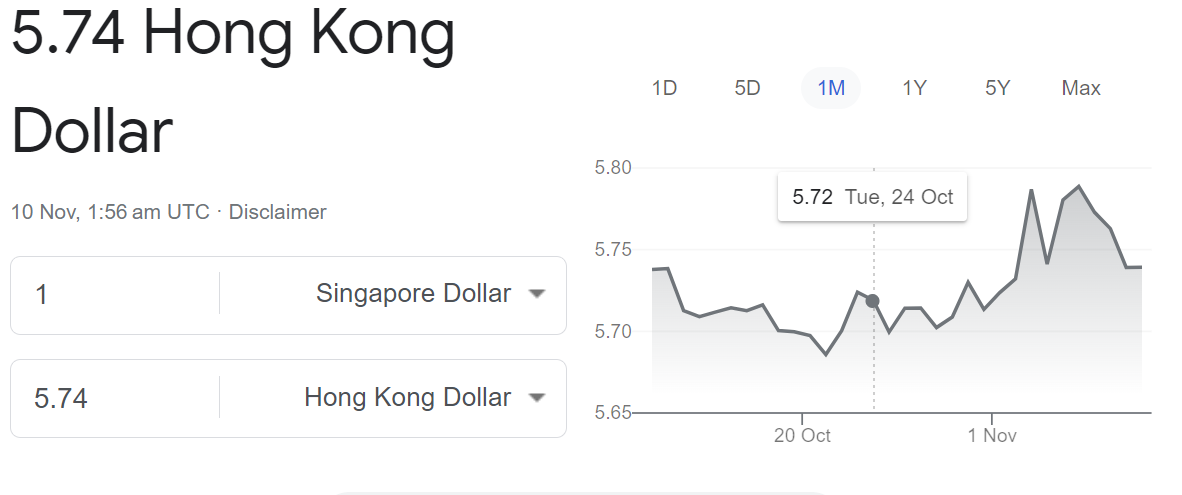

In [66]:
hk['price'] = hk['price'] / 5.74
hk['price'] = round(hk['price'],2)

In [67]:
hk.head()

,listing_id,date,available,price,minimum_nights,maximum_nights
0,17891,2023-09-17,0,243.9,60,365
1,17891,2023-09-18,0,243.9,60,365
2,17891,2023-09-19,0,243.9,60,365
3,17891,2023-09-20,0,243.9,60,365
4,17891,2023-09-21,0,243.9,60,365


## New York data

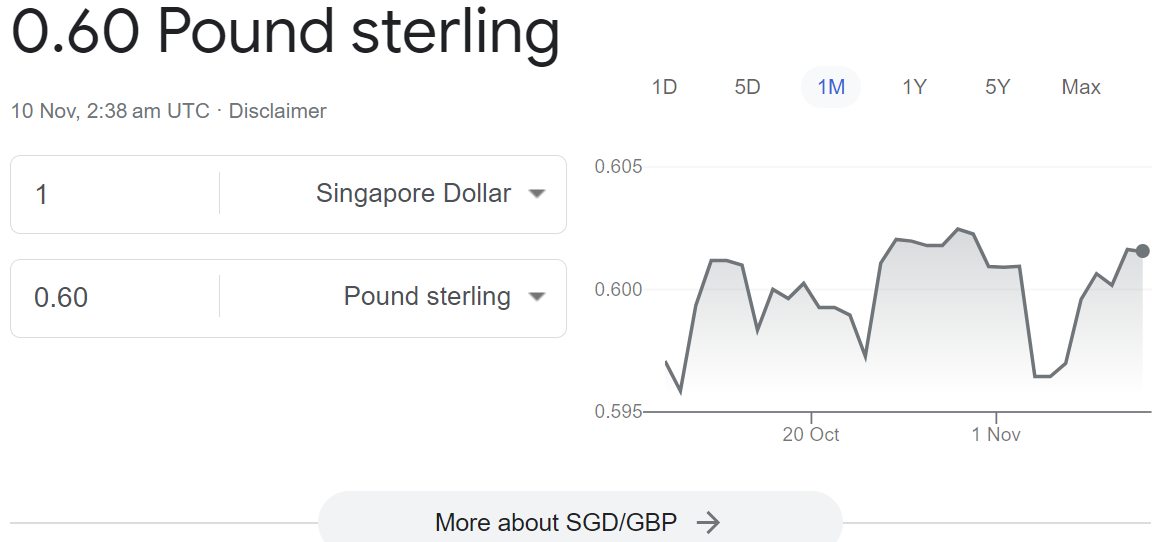

In [68]:
ny['price'] = ny['price'] / 0.60
ny['price'] = round(ny['price'],2)

In [69]:
ny.head()

,listing_id,date,available,price,minimum_nights,maximum_nights
0,2595,2023-10-02,0,400.0,30.0,1125.0
1,2595,2023-10-03,0,400.0,30.0,1125.0
2,2595,2023-10-04,0,400.0,30.0,1125.0
3,2595,2023-10-05,0,400.0,30.0,1125.0
4,2595,2023-10-06,0,400.0,30.0,1125.0


In [70]:
sg.head()

,listing_id,date,available,price,minimum_nights,maximum_nights
0,71609,2023-09-23,0,150.0,92,1125
1,71609,2023-09-24,0,150.0,92,1125
2,71609,2023-09-25,1,150.0,92,1125
3,71609,2023-09-26,1,150.0,92,1125
4,71609,2023-09-27,1,150.0,92,1125


## Combining the data

In [71]:
calendar = pd.concat([hk, sg, ny],ignore_index = True, axis=0)

In [ ]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['listing_id'] = calendar['listing_id'].astype('int64')

In [ ]:
calendar.dtypes

In [ ]:
calendar

In [43]:
calendar.isnull().sum()

listing_id         0
date               0
available          0
price              0
minimum_nights    12
maximum_nights    12
dtype: int64

In [44]:
calendar['minimum_nights'].fillna(1,inplace=True)
calendar['maximum_nights'].fillna(365,inplace=True)

In [45]:
calendar.isnull().sum()

listing_id        0
date              0
available         0
price             0
minimum_nights    0
maximum_nights    0
dtype: int64

In [46]:
calendar['minimum_nights'] = calendar['minimum_nights'].astype('int64')
calendar['maximum_nights'] = calendar['maximum_nights'].astype('int64')

In [49]:
calendar =  calendar.drop_duplicates()

In [53]:
groupby = calendar.groupby(['listing_id','date','available']).size()
duplicate = groupby[groupby>1]
duplicate

listing_id          date        available
584416000000000000  2023-09-29  1            2
                    2023-09-30  1            2
                    2023-10-01  1            2
                    2023-10-02  1            2
                    2023-10-03  1            2
                                            ..
803415000000000000  2024-09-17  1            2
                    2024-09-18  1            2
                    2024-09-19  1            2
                    2024-09-20  1            2
                    2024-09-21  1            2
Length: 4994, dtype: int64

## Data Visualization

In [23]:
selected_ids = calendar['listing_id'].unique()[:5]

C:\Users\11253\AppData\Local\Temp\ipykernel_69760\3452614031.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly = calendar.groupby([calendar['date'].dt.to_period('M'), 'listing_id']).mean().reset_index()


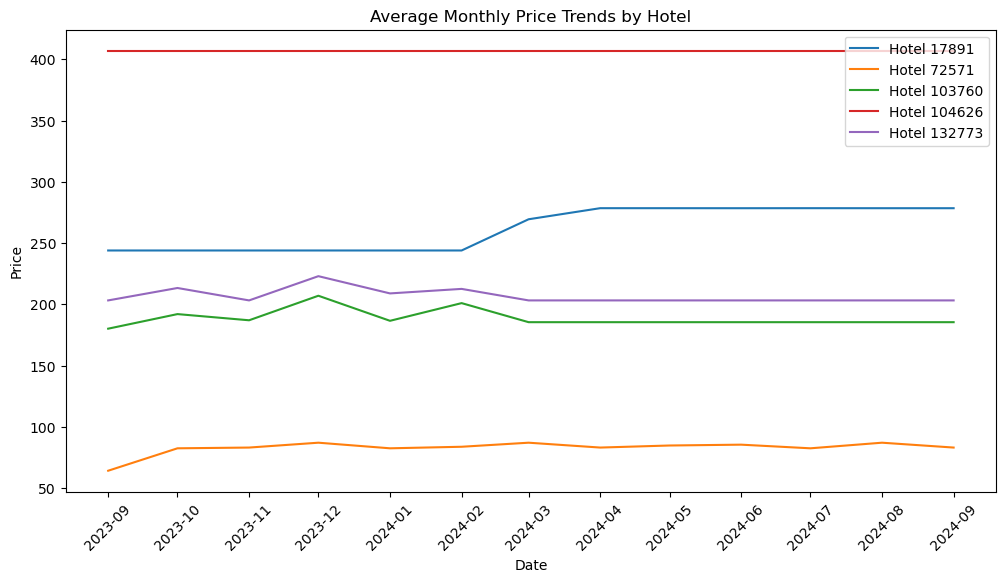

In [24]:
# Hotel price over date
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

calendar['date'] = pd.to_datetime(calendar['date'])

# Aggregate data by month
df_monthly = calendar.groupby([calendar['date'].dt.to_period('M'), 'listing_id']).mean().reset_index()
df_monthly['date'] = df_monthly['date'].dt.to_timestamp()

# Plotting
plt.figure(figsize=(12, 6))
for listing_id in calendar['listing_id'].unique()[:5]:  # Adjust this to select specific hotels
    subset = df_monthly[df_monthly['listing_id'] == listing_id]
    sns.lineplot(x='date', y='price', data=subset, label=f'Hotel {listing_id}')

plt.title('Average Monthly Price Trends by Hotel')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Customize x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Show label for each month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the date
plt.xticks(rotation=45)

plt.show()


In [25]:
# Extract year and month
calendar['year'] = calendar['date'].dt.year
calendar['month'] = calendar['date'].dt.month

# Group by listing_id, year, and month
# For this example, I'm taking the mean of the price, minimum_nights, and maximum_nights
# You can change the aggregation logic as per your requirements
monthly_data = calendar.groupby(['listing_id', 'year', 'month']).agg({
    'price': 'mean',
    'minimum_nights': 'mean',
    'maximum_nights': 'mean',
    'available': 'sum'  # For available, you might want to sum to get total availability in the month
}).reset_index()

# Now, monthly_data is your reshaped DataFrame
monthly_data['price'] = round(monthly_data['price'],2)
monthly_data.head()


,listing_id,year,month,price,minimum_nights,maximum_nights,available
0,2595,2023,10,400.0,30.0,1125.0,16
1,2595,2023,11,400.0,30.0,1125.0,30
2,2595,2023,12,400.0,30.0,1125.0,31
3,2595,2024,1,400.0,30.0,1125.0,31
4,2595,2024,2,400.0,30.0,1125.0,29


In [27]:
calendar

,cid,listing_id,date,available,price,minimum_nights,maximum_nights,year,month
0,0,17891,2023-09-17,0,243.90,60,365,2023,9
1,1,17891,2023-09-18,0,243.90,60,365,2023,9
2,2,17891,2023-09-19,0,243.90,60,365,2023,9
3,3,17891,2023-09-20,0,243.90,60,365,2023,9
4,4,17891,2023-09-21,0,243.90,60,365,2023,9
...,...,...,...,...,...,...,...,...,...
17665949,17665949,992729511234270720,2024-09-25,0,273.33,30,365,2024,9
17665950,17665950,992729511234270720,2024-09-26,0,273.33,30,365,2024,9
17665951,17665951,992729511234270720,2024-09-27,0,273.33,30,365,2024,9
17665952,17665952,992729511234270720,2024-09-28,0,273.33,30,365,2024,9


In [26]:
monthly_data

,listing_id,year,month,price,minimum_nights,maximum_nights,available
0,2595,2023,10,400.00,30.0,1125.0,16
1,2595,2023,11,400.00,30.0,1125.0,30
2,2595,2023,12,400.00,30.0,1125.0,31
3,2595,2024,1,400.00,30.0,1125.0,31
4,2595,2024,2,400.00,30.0,1125.0,29
...,...,...,...,...,...,...,...
590154,992729511234270720,2024,5,305.86,30.0,365.0,31
590155,992729511234270720,2024,6,305.66,30.0,365.0,28
590156,992729511234270720,2024,7,273.33,30.0,365.0,0
590157,992729511234270720,2024,8,273.33,30.0,365.0,0


In [28]:
calendar.to_csv('calendar.csv',index = False)
monthly_data.to_csv('calendar_monthly.csv',index = False)